<a href="https://colab.research.google.com/github/arpanastanley24/OIBSIP/blob/main/Iris_Flower_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CLASSIFICATION OF IRIS FLOWER**

ID -> Number of records

SepalLengthcm -> Length of sepals in centimeters

SepalWidthcm -> Width of sepals in centimeters

PetalLengthCm -> Length of petals in centimeters

PetalWidthCm -> Width of petals in centimeters

Species -> Species of flower from the Iris family

In [ ]:
#Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Supress Warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Import the dataset
data = pd.read_csv('/content/drive/MyDrive/Iris.csv')
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
#Removing a feature
df = data.drop(['Id'], axis=1)
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
#All the columns in the dataset
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [ ]:
#Rename the columns
df.columns=['sepal_length','sepal_width','petal_length','petal_width','species']

In [ ]:
#Retreives the first 8 rows
df.head(8)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa


In [ ]:
#Checking for missing values
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [ ]:
#Checking for duplicate values
df.duplicated().sum()

3

In [ ]:
#Removing duplicate values
df = df.drop_duplicates()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  147 non-null    float64
 1   sepal_width   147 non-null    float64
 2   petal_length  147 non-null    float64
 3   petal_width   147 non-null    float64
 4   species       147 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.9+ KB


In [ ]:
#Data types
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [ ]:
#Size of the dataset
df.shape

(147, 5)

In [ ]:
#Summary measures of the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,147.0,5.856463,0.829100,4.3,5.1,5.8,6.4,7.9
sepal_width,147.0,3.055782,0.437009,2.0,2.8,3.0,3.3,4.4
petal_length,147.0,3.780272,1.759111,1.0,1.6,4.4,5.1,6.9
petal_width,147.0,1.208844,0.757874,0.1,0.3,1.3,1.8,2.5


In [ ]:
#Values of the variable sepal length
np.array(df['sepal_length'])

array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.6, 5. , 4.4, 4.9, 5.4, 4.8, 4.8,
       4.3, 5.8, 5.7, 5.4, 5.1, 5.7, 5.1, 5.4, 5.1, 4.6, 5.1, 4.8, 5. ,
       5. , 5.2, 5.2, 4.7, 4.8, 5.4, 5.2, 5.5, 5. , 5.5, 4.4, 5.1, 5. ,
       4.5, 4.4, 5. , 5.1, 4.8, 5.1, 4.6, 5.3, 5. , 7. , 6.4, 6.9, 5.5,
       6.5, 5.7, 6.3, 4.9, 6.6, 5.2, 5. , 5.9, 6. , 6.1, 5.6, 6.7, 5.6,
       5.8, 6.2, 5.6, 5.9, 6.1, 6.3, 6.1, 6.4, 6.6, 6.8, 6.7, 6. , 5.7,
       5.5, 5.5, 5.8, 6. , 5.4, 6. , 6.7, 6.3, 5.6, 5.5, 5.5, 6.1, 5.8,
       5. , 5.6, 5.7, 5.7, 6.2, 5.1, 5.7, 6.3, 5.8, 7.1, 6.3, 6.5, 7.6,
       4.9, 7.3, 6.7, 7.2, 6.5, 6.4, 6.8, 5.7, 5.8, 6.4, 6.5, 7.7, 7.7,
       6. , 6.9, 5.6, 7.7, 6.3, 6.7, 7.2, 6.2, 6.1, 6.4, 7.2, 7.4, 7.9,
       6.4, 6.3, 6.1, 7.7, 6.3, 6.4, 6. , 6.9, 6.7, 6.9, 6.8, 6.7, 6.7,
       6.3, 6.5, 6.2, 5.9])

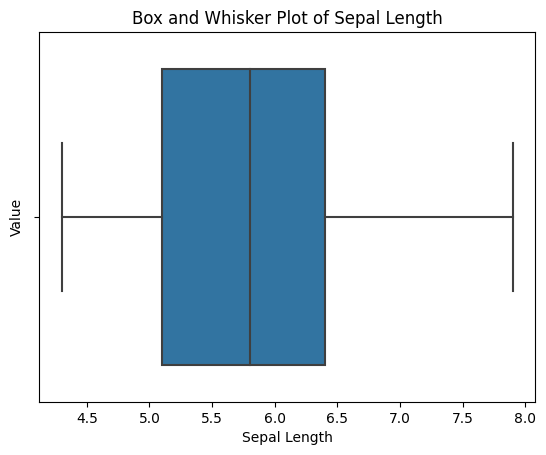

In [ ]:
# Plot the box or whisker plot using Seaborn
sns.boxplot(x=df['sepal_length'])
plt.xlabel('Sepal Length')
plt.ylabel('Value')
plt.title('Box and Whisker Plot of Sepal Length')
plt.show()

In [ ]:
#Values of the variable sepal width
np.array(df['sepal_width'])

array([3.5, 3. , 3.2, 3.1, 3.6, 3.9, 3.4, 3.4, 2.9, 3.1, 3.7, 3.4, 3. ,
       3. , 4. , 4.4, 3.9, 3.5, 3.8, 3.8, 3.4, 3.7, 3.6, 3.3, 3.4, 3. ,
       3.4, 3.5, 3.4, 3.2, 3.1, 3.4, 4.1, 4.2, 3.2, 3.5, 3. , 3.4, 3.5,
       2.3, 3.2, 3.5, 3.8, 3. , 3.8, 3.2, 3.7, 3.3, 3.2, 3.2, 3.1, 2.3,
       2.8, 2.8, 3.3, 2.4, 2.9, 2.7, 2. , 3. , 2.2, 2.9, 2.9, 3.1, 3. ,
       2.7, 2.2, 2.5, 3.2, 2.8, 2.5, 2.8, 2.9, 3. , 2.8, 3. , 2.9, 2.6,
       2.4, 2.4, 2.7, 2.7, 3. , 3.4, 3.1, 2.3, 3. , 2.5, 2.6, 3. , 2.6,
       2.3, 2.7, 3. , 2.9, 2.9, 2.5, 2.8, 3.3, 2.7, 3. , 2.9, 3. , 3. ,
       2.5, 2.9, 2.5, 3.6, 3.2, 2.7, 3. , 2.5, 2.8, 3.2, 3. , 3.8, 2.6,
       2.2, 3.2, 2.8, 2.8, 2.7, 3.3, 3.2, 2.8, 3. , 2.8, 3. , 2.8, 3.8,
       2.8, 2.8, 2.6, 3. , 3.4, 3.1, 3. , 3.1, 3.1, 3.1, 3.2, 3.3, 3. ,
       2.5, 3. , 3.4, 3. ])

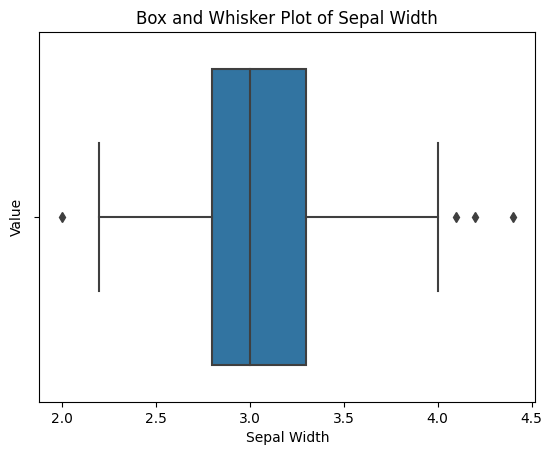

In [ ]:
# Plot the box or whisker plot using Seaborn
sns.boxplot(x=df['sepal_width'])
plt.xlabel('Sepal Width')
plt.ylabel('Value')
plt.title('Box and Whisker Plot of Sepal Width')
plt.show()

In [ ]:
#Values of the variable petal length
np.array(df['petal_length'])

array([1.4, 1.4, 1.3, 1.5, 1.4, 1.7, 1.4, 1.5, 1.4, 1.5, 1.5, 1.6, 1.4,
       1.1, 1.2, 1.5, 1.3, 1.4, 1.7, 1.5, 1.7, 1.5, 1. , 1.7, 1.9, 1.6,
       1.6, 1.5, 1.4, 1.6, 1.6, 1.5, 1.5, 1.4, 1.2, 1.3, 1.3, 1.5, 1.3,
       1.3, 1.3, 1.6, 1.9, 1.4, 1.6, 1.4, 1.5, 1.4, 4.7, 4.5, 4.9, 4. ,
       4.6, 4.5, 4.7, 3.3, 4.6, 3.9, 3.5, 4.2, 4. , 4.7, 3.6, 4.4, 4.5,
       4.1, 4.5, 3.9, 4.8, 4. , 4.9, 4.7, 4.3, 4.4, 4.8, 5. , 4.5, 3.5,
       3.8, 3.7, 3.9, 5.1, 4.5, 4.5, 4.7, 4.4, 4.1, 4. , 4.4, 4.6, 4. ,
       3.3, 4.2, 4.2, 4.2, 4.3, 3. , 4.1, 6. , 5.1, 5.9, 5.6, 5.8, 6.6,
       4.5, 6.3, 5.8, 6.1, 5.1, 5.3, 5.5, 5. , 5.1, 5.3, 5.5, 6.7, 6.9,
       5. , 5.7, 4.9, 6.7, 4.9, 5.7, 6. , 4.8, 4.9, 5.6, 5.8, 6.1, 6.4,
       5.6, 5.1, 5.6, 6.1, 5.6, 5.5, 4.8, 5.4, 5.6, 5.1, 5.9, 5.7, 5.2,
       5. , 5.2, 5.4, 5.1])

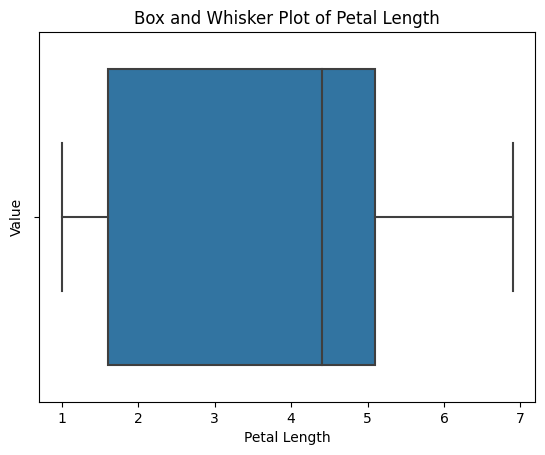

In [ ]:
# Plot the box or whisker plot using Seaborn
sns.boxplot(x=df['petal_length'])
plt.xlabel('Petal Length')
plt.ylabel('Value')
plt.title('Box and Whisker Plot of Petal Length')
plt.show()

In [ ]:
#Values of the variable sepal width
np.array(df['sepal_width'])

array([3.5, 3. , 3.2, 3.1, 3.6, 3.9, 3.4, 3.4, 2.9, 3.1, 3.7, 3.4, 3. ,
       3. , 4. , 4.4, 3.9, 3.5, 3.8, 3.8, 3.4, 3.7, 3.6, 3.3, 3.4, 3. ,
       3.4, 3.5, 3.4, 3.2, 3.1, 3.4, 4.1, 4.2, 3.2, 3.5, 3. , 3.4, 3.5,
       2.3, 3.2, 3.5, 3.8, 3. , 3.8, 3.2, 3.7, 3.3, 3.2, 3.2, 3.1, 2.3,
       2.8, 2.8, 3.3, 2.4, 2.9, 2.7, 2. , 3. , 2.2, 2.9, 2.9, 3.1, 3. ,
       2.7, 2.2, 2.5, 3.2, 2.8, 2.5, 2.8, 2.9, 3. , 2.8, 3. , 2.9, 2.6,
       2.4, 2.4, 2.7, 2.7, 3. , 3.4, 3.1, 2.3, 3. , 2.5, 2.6, 3. , 2.6,
       2.3, 2.7, 3. , 2.9, 2.9, 2.5, 2.8, 3.3, 2.7, 3. , 2.9, 3. , 3. ,
       2.5, 2.9, 2.5, 3.6, 3.2, 2.7, 3. , 2.5, 2.8, 3.2, 3. , 3.8, 2.6,
       2.2, 3.2, 2.8, 2.8, 2.7, 3.3, 3.2, 2.8, 3. , 2.8, 3. , 2.8, 3.8,
       2.8, 2.8, 2.6, 3. , 3.4, 3.1, 3. , 3.1, 3.1, 3.1, 3.2, 3.3, 3. ,
       2.5, 3. , 3.4, 3. ])

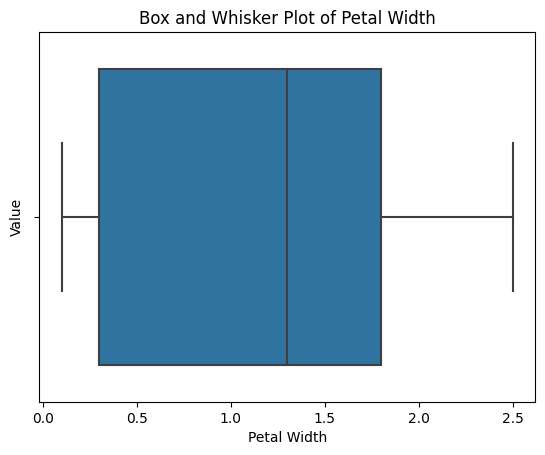

In [ ]:
# Plot the box or whisker plot using Seaborn
sns.boxplot(x=df['petal_width'])
plt.xlabel('Petal Width')
plt.ylabel('Value')
plt.title('Box and Whisker Plot of Petal Width')
plt.show()

In [ ]:
#Number of unique values in the feature
df['species'].nunique()

3

In [ ]:
#Number of different types of species
df['species'].value_counts()

Iris-versicolor    50
Iris-virginica     49
Iris-setosa        48
Name: species, dtype: int64

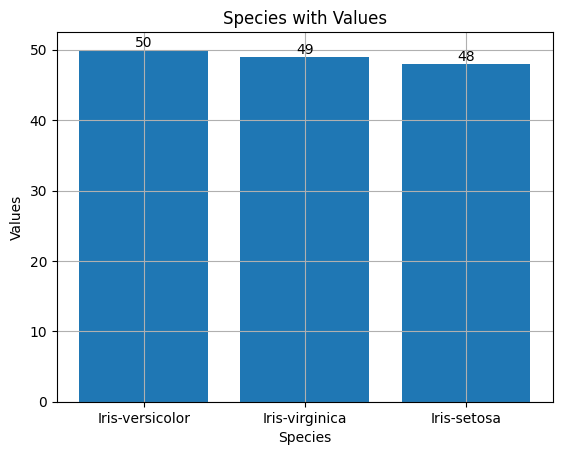

In [ ]:
species = {'Iris-versicolor': 50, 'Iris-virginica': 49, 'Iris-setosa': 48}

# Plotting the bar chart
plt.bar(species.keys(), species.values())

# Adding values on top of each bar
for category, value in species.items():
    plt.text(category, value, str(value), ha='center', va='bottom')

# Adding labels and title
plt.xlabel('Species')
plt.ylabel('Values')
plt.title('Species with Values')

plt.grid(True)

# Displaying the plot
plt.show()

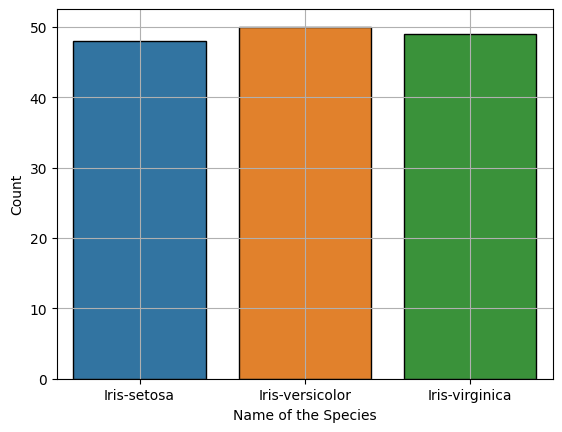

In [ ]:
#Number of different types of species representing using countplot
sns.countplot(data=df,x='species',ec='black')
plt.xlabel("Name of the Species")
plt.ylabel("Count")
plt.grid(True)
plt.show()

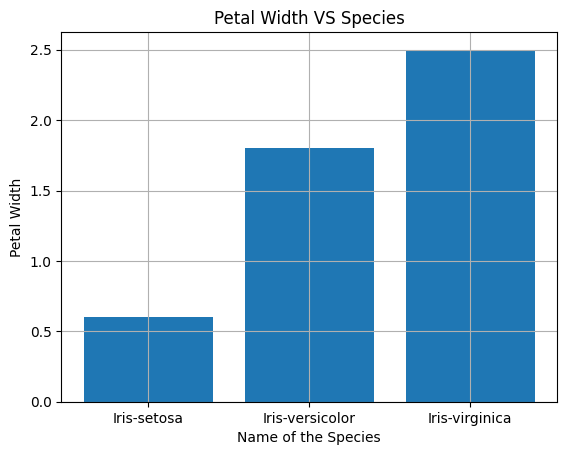

In [ ]:
#Number of different types of species vs petal width representing using barplot
plt.bar(df['species'],df['petal_width'])
plt.title("Petal Width VS Species")
plt.xlabel("Name of the Species")
plt.ylabel("Petal Width")
plt.grid(True)
plt.show()

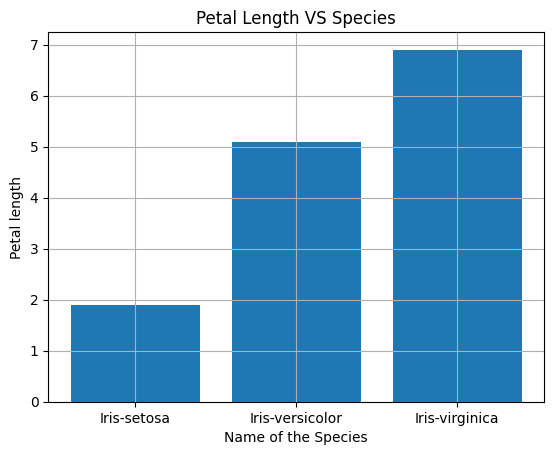

In [ ]:
#Number of different types of species vs petal length representing using barplot
plt.bar(df['species'],df['petal_length'])
plt.title("Petal Length VS Species")
plt.xlabel("Name of the Species")
plt.ylabel("Petal length")
plt.grid(True)
plt.show()

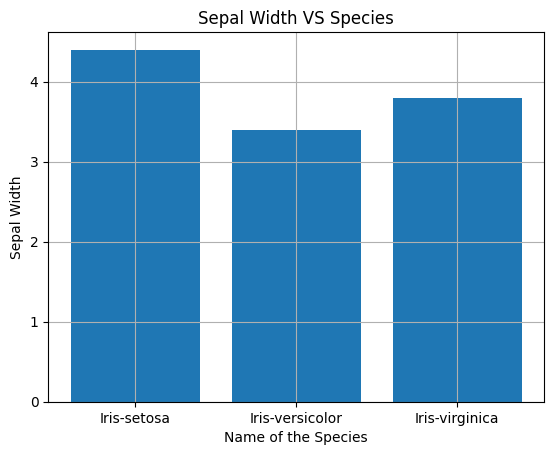

In [ ]:
#Number of different types of species vs sepal width representing using barplot
plt.bar(df['species'],df['sepal_width'])
plt.title("Sepal Width VS Species")
plt.xlabel("Name of the Species")
plt.ylabel("Sepal Width")
plt.grid(True)
plt.show()

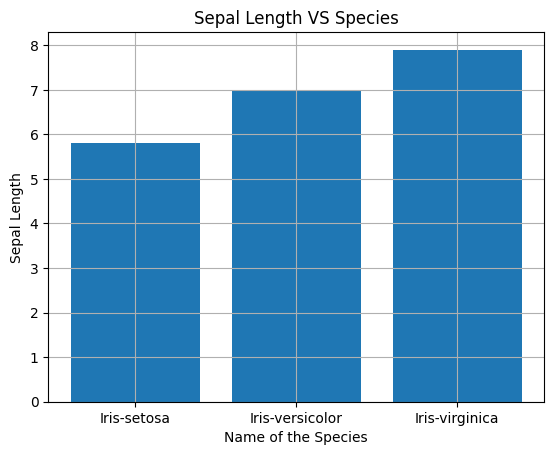

In [ ]:
#Number of different types of species vs sepal length representing using barplot
plt.bar(df['species'],df['sepal_length'])
plt.title("Sepal Length VS Species")
plt.xlabel("Name of the Species")
plt.ylabel("Sepal Length")
plt.grid(True)
plt.show()

<Figure size 300x300 with 0 Axes>

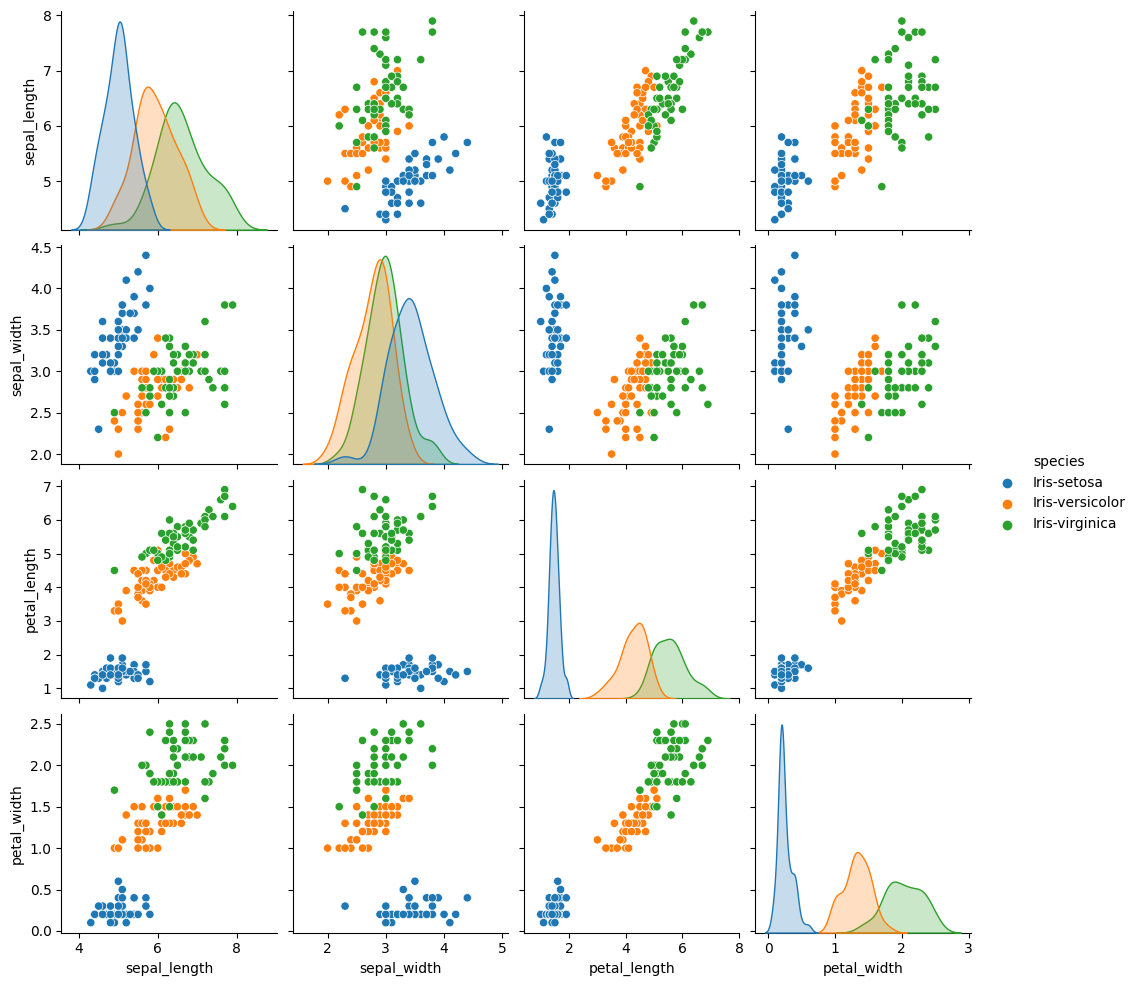

In [ ]:
#Plot for dataset using pairplot
plt.figure(figsize=(3,3))
sns.pairplot(df,hue='species')
plt.show()

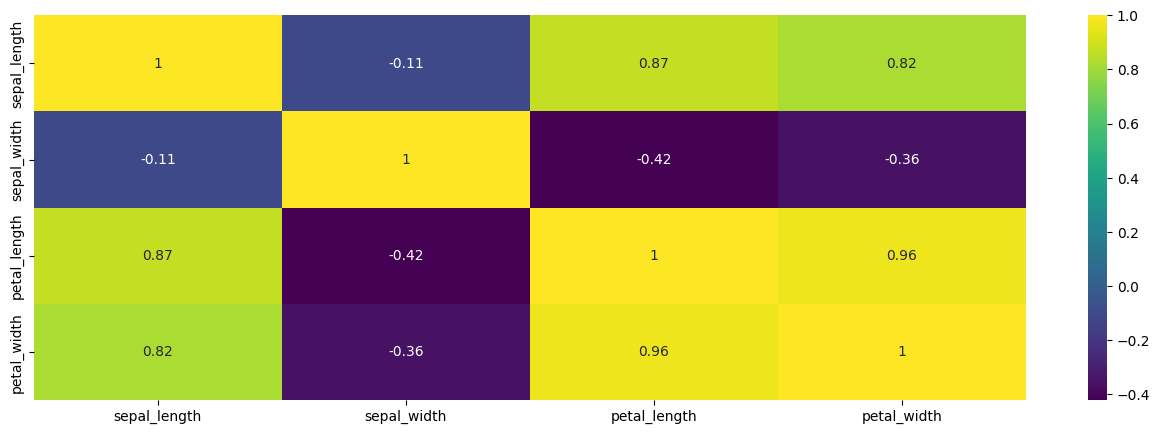

In [ ]:
#Correlation between features using heatmap
plt.figure(figsize = (16, 5))
sns.heatmap(df.corr(), annot = True, cmap="viridis")
plt.show()

In [ ]:
#Independent variables
x = df.drop(['species'],axis = 1)
x

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
#Dependent variable
y = df['species']
print(y)

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: species, Length: 147, dtype: object


# **ENCODING**

In [ ]:
#Encoding the dependent variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


## **0 - Iris-setosa**
## **1 - Iris-versicolor**
## **2 - Iris-virginica**

# **CORRELATION USING PEARSON METHOD**

In [ ]:
#Correlation between the independent features
selected_features = x.columns
selected_features

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

In [ ]:
selected_features[2]

'petal_length'

In [ ]:
#Importing the pearsonr function from the scipy.stats module
from scipy.stats import pearsonr
corr = pearsonr(x[selected_features[2]], y)
corr

PearsonRResult(statistic=0.9483385082992367, pvalue=3.535795983979732e-74)

In [ ]:
# Writing a for loop to find the correlation between 4 independent variables and the dependent variable using pearsonr() function the error on this line is an index exception, which can be ignored
new_list=[]
for i in range(0,4):
    corr, _ = pearsonr(x[selected_features[i]], y)
    print('Pearsons correlation: %.3f' % corr,[selected_features[i]])
    new_list.append(corr)

Pearsons correlation: 0.783 ['sepal_length']
Pearsons correlation: -0.418 ['sepal_width']
Pearsons correlation: 0.948 ['petal_length']
Pearsons correlation: 0.956 ['petal_width']


# **SCALING THE NUMERIC FEATURES**

In [ ]:
#Standardization
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

In [ ]:
np.array(x)

array([[-0.91550949,  1.0199714 , -1.35773692, -1.33570001],
       [-1.15755966, -0.12808217, -1.35773692, -1.33570001],
       [-1.39960983,  0.33113926, -1.41477817, -1.33570001],
       [-1.52063491,  0.10152855, -1.30069567, -1.33570001],
       [-1.03653457,  1.24958212, -1.35773692, -1.33570001],
       [-0.55243423,  1.93841426, -1.18661318, -1.07090176],
       [-1.52063491,  0.79036069, -1.35773692, -1.20330089],
       [-1.03653457,  0.79036069, -1.30069567, -1.33570001],
       [-1.76268509, -0.35769288, -1.35773692, -1.33570001],
       [-1.15755966,  0.10152855, -1.30069567, -1.46809914],
       [-0.55243423,  1.47919283, -1.30069567, -1.33570001],
       [-1.27858474,  0.79036069, -1.24365442, -1.33570001],
       [-1.27858474, -0.12808217, -1.35773692, -1.46809914],
       [-1.88371017, -0.12808217, -1.52886066, -1.46809914],
       [-0.06833389,  2.16802498, -1.47181942, -1.33570001],
       [-0.18935898,  3.08646783, -1.30069567, -1.07090176],
       [-0.55243423,  1.

# **TRAINING VALIDATION AND TEST SETS**

In [ ]:
#Train and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [ ]:
#Size of the train and test sets
print('The size of x_train is', x_train.shape)
print('The size of x_test is', x_test.shape)
print('The size of y_train is', y_train.shape)
print('The size of y_test is', y_test.shape)

The size of x_train is (110, 4)
The size of x_test is (37, 4)
The size of y_train is (110,)
The size of y_test is (37,)


# **MODEL BUILDING**

In [ ]:
#Importing classification models
from sklearn.model_selection import cross_val_score, KFold
cv=KFold(n_splits=5, random_state=0, shuffle=True)

# **LOGISTIC REGRESSION**

* Logistic regression is used for solving the classification problems.

* It is used for predicting the categorical dependent variable using a given set of independent variables.

* Logistic regression predicts the output of a categorical dependent variable. Therefore the outcome must be a categorical or discrete value. It can be either Yes or No, 0 or 1, true or False, etc..

In [ ]:
from sklearn.linear_model import LogisticRegression
lrModel = LogisticRegression()

# **K-NEAREST NEIGHBOR**

* K-NN algorithm assumes the similarity between the new case/data and available cases and put the new case into the category that is most similar to the available categories.

* K-NN algorithm stores all the available data and classifies a new data point based on the similarity. This means when new data appears then it can be easily classified into a well suite category by using K- NN algorithm.

* It is also called a lazy learner algorithm because it does not learn from the training set immediately instead it stores the dataset and at the time of classification, it performs an action on the dataset.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KnModel = KNeighborsClassifier()

# **RANDOM FOREST CLASSIFIER**

* Random Forest is a classifier that contains a number of decision trees on various subsets of the given dataset and takes the average to improve the predictive accuracy of that dataset.

* The greater number of trees in the forest leads to higher accuracy and prevents the problem of overfitting.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RfModel = RandomForestClassifier()

# **DECISION TREE CLASSIFIER**

* It is a graphical representation for getting all the possible solutions to a problem/decision based on given conditions.

* It is a tree-structured classifier, where internal nodes represent the features of a dataset, branches represent the decision rules and each leaf node represents the outcome.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
DtModel = DecisionTreeClassifier()

# **SUPPORT VECTOR CLASSIFIER**

* The goal of the SVM algorithm is to create the best line or decision boundary that can segregate n-dimensional space into classes so that can easily put the new data point in the correct category in the future. This best decision boundary is called a hyperplane.

* SVM chooses the extreme points/vectors that help in creating the hyperplane.
* These extreme cases are called as support vectors, and hence algorithm is termed as Support Vector Machine.

In [ ]:
from sklearn.svm import SVC
SvmModel = SVC()

In [ ]:
scores = cross_val_score(lrModel, x_train, y_train, cv = cv, scoring='accuracy')
print("Logistics Regression Average CV Score: ",scores.mean())

scores = cross_val_score(KnModel, x_train, y_train, cv = cv, scoring='accuracy')
print("KNeighbors Average CV Score: ",scores.mean())

scores = cross_val_score(DtModel, x_train, y_train, cv = cv, scoring='accuracy')
print("Decision Tree Average CV Score: ",scores.mean())

scores = cross_val_score(RfModel, x_train, y_train, cv = cv, scoring='accuracy')
print("Random Forest Average CV Score: ",scores.mean())

scores = cross_val_score(SvmModel, x_train, y_train, cv = cv, scoring='accuracy')
print("Support Vector Machine Average CV Score: ",scores.mean())

Logistics Regression Average CV Score:  0.9545454545454547
KNeighbors Average CV Score:  0.9454545454545455
Decision Tree Average CV Score:  0.9272727272727274
Random Forest Average CV Score:  0.9363636363636363
Support Vector Machine Average CV Score:  0.9454545454545455


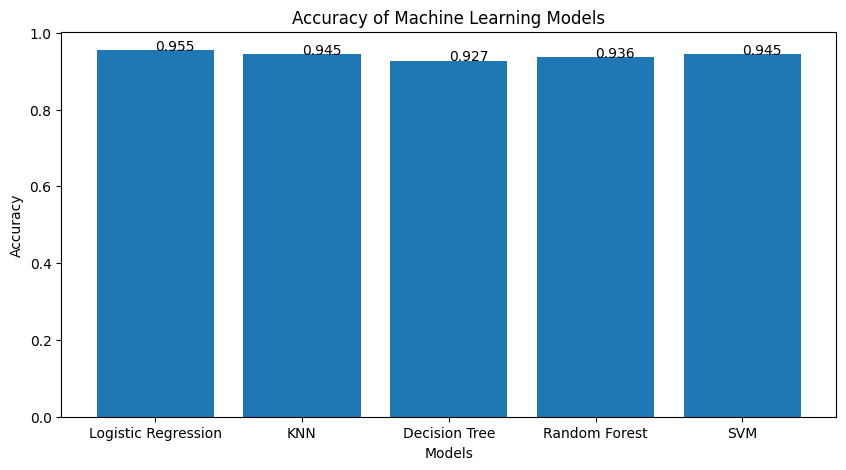

In [ ]:
#Plotting the accuracy of the models
models = ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'SVM']
accuracy = [0.955, 0.945, 0.927, 0.936, 0.945]

fig, ax = plt.subplots()
ax.bar(models, accuracy)

# Set the figure size
fig.set_size_inches(10, 5)  # Adjust the width and height in inches as desired

for index, value in enumerate(accuracy):
    plt.text(index, value, str(value))

# Add labels and titles
ax.set_xlabel('Models')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy of Machine Learning Models')

# Display the plot
plt.show()

## **Logistic Regression performs the highest accuracy**

# **LOGISTIC REGRESSION**

Accuracy score :  0.972972972972973
r2 score :  0.9581447963800905
precision score :  0.972972972972973
recall score :  0.972972972972973
f1 score :  0.972972972972973

classification report 



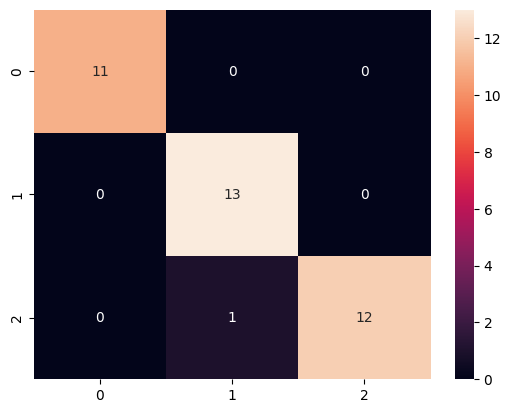

In [ ]:
#Building the logistic regression model
classifier = LogisticRegression()
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

#Evaluation of the model
from sklearn.metrics import confusion_matrix, f1_score, recall_score, precision_score, r2_score, accuracy_score, classification_report
print("Accuracy score : ",accuracy_score(y_pred,y_test))
print("r2 score : ",r2_score(y_pred,y_test))
print("precision score : ",precision_score(y_pred,y_test,average='micro'))
print("recall score : ",recall_score(y_pred,y_test,average='micro'))
print("f1 score : ",f1_score(y_pred,y_test,average='micro'))
print("\nclassification report \n")
sns.heatmap(confusion_matrix(y_pred,y_test), annot = True)
plt.show()

# **HYPERAPARAMETER TUNING FOR LOGISTIC REGRESSION**

In [ ]:
#Parameters for logistic regression
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'max_iter': [50, 100, 200],
    'class_weight': [None, 'balanced', {0: 0.3, 1: 0.7}]
}

# Initialize LogisticRegression
Classifier = LogisticRegression()

# Importing and initialize GridSearchCV
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=Classifier, param_grid=param_grid, cv=3, scoring='accuracy')

# Fit GridSearchCV to training data
grid_search.fit(x_train, y_train)

# Print best parameters and score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_:.4f}")

Best parameters: {'C': 10, 'class_weight': 'balanced', 'max_iter': 50, 'penalty': 'l2'}
Best score: 0.9730


# **FINAL MODEL**

Accuracy score :  0.972972972972973
r2 score :  0.9581447963800905
precision score :  0.972972972972973
recall score :  0.972972972972973
f1 score :  0.972972972972973

classification report 



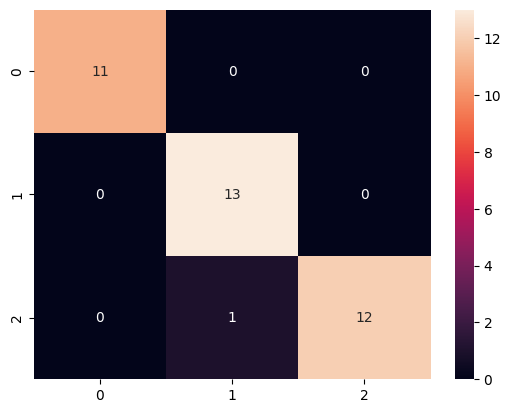

In [ ]:
#Building the logistic regression model
classifier = LogisticRegression(C=10, class_weight='balanced', max_iter=50, penalty='l2')
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

#Evaluation of the model
from sklearn.metrics import confusion_matrix, f1_score, recall_score, precision_score, r2_score, accuracy_score, classification_report
print("Accuracy score : ",accuracy_score(y_pred,y_test))
print("r2 score : ",r2_score(y_pred,y_test))
print("precision score : ",precision_score(y_pred,y_test,average='micro'))
print("recall score : ",recall_score(y_pred,y_test,average='micro'))
print("f1 score : ",f1_score(y_pred,y_test,average='micro'))
print("\nclassification report \n")
sns.heatmap(confusion_matrix(y_pred,y_test), annot = True)
plt.show()